In [30]:
import phoebe
import numpy as np
from spice.models.phoebe_model import PhoebeModel
from spice.spectrum import simulate_spectrum
from transformer_payne import Blackbody

In [31]:
import astropy.units as u
u.solRad.to(u.cm)

69570000000.0

In [32]:
4*np.pi*69570000000.0**2

6.082104402130212e+22

In [33]:
import matplotlib
%matplotlib inline

In [34]:
from phoebe.parameters.dataset import _mesh_columns

In [35]:
b = phoebe.default_binary()
times = np.linspace(0, 1, 10)
COLUMNS = _mesh_columns
b.set_quantity('period@binary', 1)
b.add_dataset('mesh', times=times, columns=COLUMNS, dataset='mesh01')
b.add_dataset('orb', compute_times=times, dataset='orb01')
b.run_compute(irrad_method='none', coordinates='uvw')

100%|██████████| 10/10 [00:00<00:00, 47.95it/s]


<ParameterSet: 637 parameters | kinds: orb, mesh>

In [36]:
b.get_quantity('period@binary')

<Quantity 1. d>

In [37]:
from spice.models.phoebe_utils import PhoebeConfig
p1 = PhoebeConfig(b, 'mesh01', 'orb01')

In [38]:
b.get_parameter(qualifier='vus', component='primary', dataset='orb01', kind='orb')

<Parameter: vus=[-134.07073898 -102.70414458  -23.2811395  ...
  -23.2811395  -102.70414458 -134.07073898] km / s | keys: description, value, default_unit, visible_if, required_shape, copy_for, readonly, advanced, latexfmt>

In [39]:
bb = Blackbody()
pm1 = PhoebeModel.construct(p1, times[0], bb.parameter_names, component='primary')
pm2 = PhoebeModel.construct(p1, times[0], bb.parameter_names, component='secondary')

In [40]:
from spice.models.binary import Binary, PhoebeBinary
import matplotlib.pyplot as plt

binary = Binary.from_bodies(pm1, pm2)
pb = PhoebeBinary.construct(p1, bb.parameter_names)

In [41]:
pb.body1_velocities

array([[-1.34070739e+02,  5.02684756e-31, -8.20946507e-15],
       [-1.02704145e+02, -5.27694243e-15,  8.61790098e+01],
       [-2.32811395e+01, -8.08474485e-15,  1.32033903e+02],
       [ 6.70353695e+01, -7.10960530e-15,  1.16108666e+02],
       [ 1.25985284e+02, -2.80780242e-15,  4.58548934e+01],
       [ 1.25985284e+02,  2.80780242e-15, -4.58548934e+01],
       [ 6.70353695e+01,  7.10960530e-15, -1.16108666e+02],
       [-2.32811395e+01,  8.08474485e-15, -1.32033903e+02],
       [-1.02704145e+02,  5.27694243e-15, -8.61790098e+01],
       [-1.34070739e+02,  2.32555218e-30, -3.79791493e-14]])

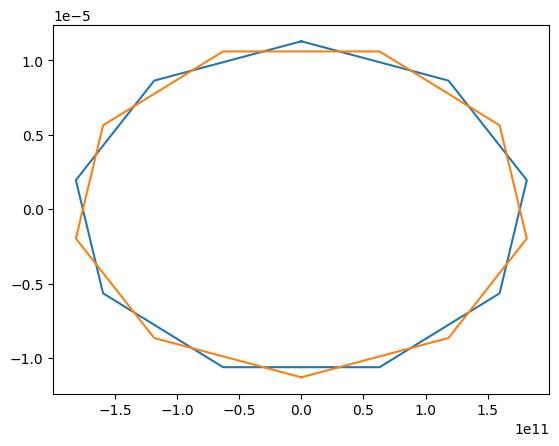

In [42]:
plt.plot(pb.body1_centers[:, 0], pb.body1_centers[:, 1])
plt.plot(pb.body2_centers[:, 0], pb.body2_centers[:, 1])

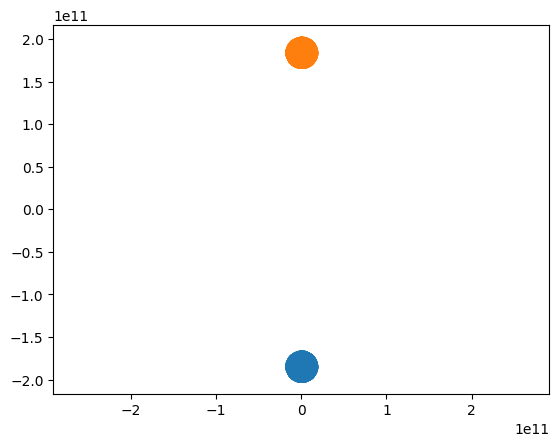

In [56]:


plt.scatter(pb.body1.centers[:, 0], pb.body1.centers[:, 2])
plt.scatter(pb.body2.centers[:, 0], pb.body2.centers[:, 2])

plt.axis('equal')
plt.show()

In [44]:
u.day.to(u.year)

0.0027378507871321013

In [45]:
binary.body1.cast_centers

array([[-2.79350229e+09,  6.88209702e+10, -3.73559869e+11],
       [-5.58699696e+09,  6.88094828e+10, -3.68721396e+11],
       [-2.79349630e+09,  6.88041133e+10, -3.63882915e+11],
       ...,
       [ 2.34092083e+10, -4.05490865e+10, -3.17090197e+11],
       [ 2.40236187e+10, -3.62151903e+10, -3.14113750e+11],
       [ 2.09323093e+10, -3.58184742e+10, -3.12556354e+11]])

In [46]:
binary.body2.cast_centers

array([[ 2.79350229e+09,  6.88209702e+10,  3.73559869e+11],
       [ 5.58699696e+09,  6.88094828e+10,  3.68721396e+11],
       [ 2.79349630e+09,  6.88041133e+10,  3.63882915e+11],
       ...,
       [-2.34092083e+10, -4.05490865e+10,  3.17090197e+11],
       [-2.40236187e+10, -3.62151903e+10,  3.14113750e+11],
       [-2.09323093e+10, -3.58184742e+10,  3.12556354e+11]])

In [47]:
# import matplotlib as mpl
# from mpl_toolkits.mplot3d import art3d
# from numpy.typing import ArrayLike
# from typing import Tuple, Optional, Union

# PLOT_MODES = ['MESH', 'POINTS']
# COLORMAP_PROPERTIES = ['mus', 'los_velocities', 'cast_areas']
# DEFAULT_PROPERTY = 'mus'

# DEFAULT_PLOT_PROPERTY_LABELS = {
#     'mus': r'$\mu$',
#     'los_velocities': 'LOS velocity [km/s]'
# }


# def _evaluate_to_be_mapped_property(mesh,
#                                     property: Union[str, int] = DEFAULT_PROPERTY,
#                                     property_label: Optional[str] = None) -> Tuple[ArrayLike, str]:
#     if type(property) is str:
#         if property not in COLORMAP_PROPERTIES:
#             raise ValueError(f'Invalid property {property} - must be one of ({",".join(COLORMAP_PROPERTIES)})')
#         else:
#             to_be_mapped = getattr(mesh, property)
#         if property_label is None:
#             property_label = DEFAULT_PLOT_PROPERTY_LABELS.get(property, '')
#     elif type(property) is int:
#         if property > mesh.parameters.shape[-1]-1:
#             raise ValueError(f'Invalid property index {property} - must be smaller than {mesh.parameters.shape[-1]}')
#         else:
#             to_be_mapped = mesh.parameters[:, property]
#         if property_label is None:
#             property_label = ''
#     else:
#         raise ValueError(f"Property must be either of type str or int")
    
#     return to_be_mapped, property_label


# def plot_3D_binary(binary,
#                     property: Union[str, int] = DEFAULT_PROPERTY,
#                     axes: Optional[Tuple[plt.figure, plt.axes]] = None,
#                     cmap: str = 'turbo',
#                     property_label: Optional[str] = None,
#                     mode: str = 'MESH',
#                     update_colorbar: bool = True):
    
#     if mode.upper() not in PLOT_MODES:
#         raise ValueError(f'Mode must be one of ["MESH", "POINTS"]. Got {mode.upper()}')
#     mode = mode.upper()
    
#     mesh = binary.body1
#     to_be_mapped1, cbar_label = _evaluate_to_be_mapped_property(mesh, property, property_label)
#     to_be_mapped2, _ = _evaluate_to_be_mapped_property(binary.body2, property, property_label)

#     if axes is None:
#         fig = plt.figure(figsize=(10, 12))
#         spec = fig.add_gridspec(10, 12)
#         plot_ax = fig.add_subplot(spec[:, :11], projection='3d')
#         plot_ax.view_init(elev=30, azim=60)
#     else:
#         try:
#             fig, plot_ax = axes
#         except ValueError:
#             raise ValueError("Pass either no axes or (plt.figure, plt.axes, plt.axes) for the plot axis and colorbar axis")
#     max_orbit = np.max(np.abs((binary.body1.centers) - (binary.body2.centers)))
#     axes_lim = 1.05*max_orbit
#     plot_ax.set_xlim3d(-axes_lim, axes_lim)
#     plot_ax.set_ylim3d(-axes_lim, axes_lim)
#     plot_ax.set_zlim3d(-axes_lim, axes_lim)
#     plot_ax.set_xlabel('$X [R_\\odot]$', fontsize=14)
#     plot_ax.set_ylabel('$Y [R_\\odot]$', fontsize=14)
#     plot_ax.set_zlabel('$Z [R_\\odot]$', fontsize=14)

#     normalized_los_vector = mesh.los_vector/np.linalg.norm(mesh.los_vector)
#     normalized_rotation_axis = mesh.rotation_axis/np.linalg.norm(mesh.rotation_axis)

#     plot_ax.quiver(*(-1.1*axes_lim*normalized_los_vector), *(mesh.radius*normalized_los_vector),
#                    color='red', linewidth=3., label='LOS vector')
#     plot_ax.legend()

#     all_mapped = np.concatenate([to_be_mapped1, to_be_mapped2])
#     norm = mpl.colors.Normalize(vmin=all_mapped.min(), vmax=all_mapped.max())
#     mappable = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)

#     if mode == 'MESH':
#         vs2 = mesh.vertices
#         face_colors = mpl.colormaps[cmap](norm(to_be_mapped1))
#         p = art3d.Poly3DCollection(vs2, facecolors=face_colors, edgecolor="black")
#         plot_ax.add_collection(p)
#         p2 = art3d.Poly3DCollection(binary.body2.vertices, facecolors=mpl.colormaps[cmap](norm(to_be_mapped2)), edgecolor="black")
#         plot_ax.add_collection(p2)
#         mappable.set_array([])
#     else:
#         p = plot_ax.scatter(mesh.centers[:, 0], mesh.centers[:, 1], mesh.centers[:, 2],
#                             c=to_be_mapped1, cmap=cmap, norm=norm)
        
#     if update_colorbar:
#         cbar = fig.colorbar(mappable, shrink=0.45, pad=0.125, ax=plot_ax)
#         cbar.set_label(cbar_label, fontsize=12)

#     return fig, plot_ax

In [48]:
# plot_3D_binary(binary)

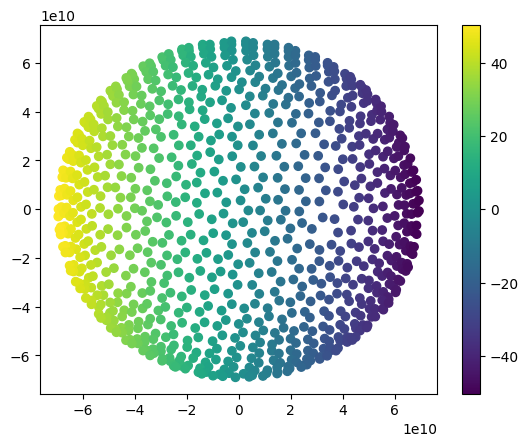

In [55]:
plt.scatter(pm2.cast_centers[pm2.mus>0, 0], pm2.cast_centers[pm2.mus>0, 1], c=pm2.los_velocities[pm2.mus>0])
plt.colorbar();

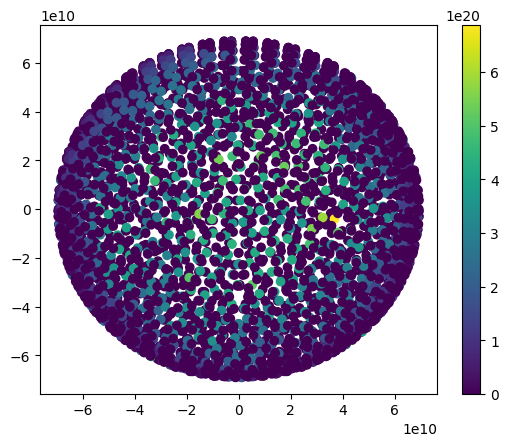

In [50]:
plt.scatter(pb.body1.cast_centers[:, 0], pb.body1.cast_centers[:, 1], c=pb.body1.cast_areas)
plt.scatter(pb.body2.cast_centers[:, 0], pb.body2.cast_centers[:, 1], c=pb.body2.cast_areas)
plt.colorbar();

In [51]:
from spice.models.binary import evaluate_orbit


ws = np.linspace(4000, 10000, 1000)
s = simulate_spectrum(bb.intensity, pm2, np.log10(ws))

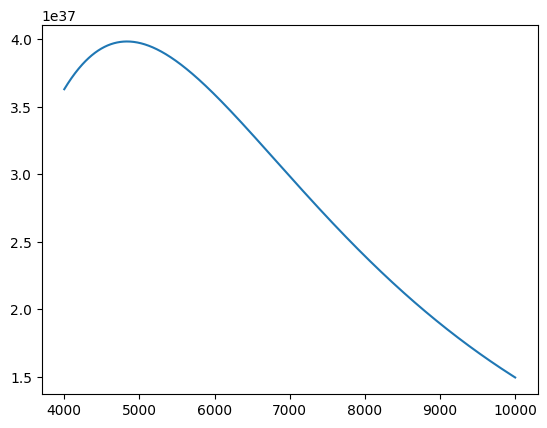

In [52]:
import matplotlib.pyplot as plt
plt.plot(ws, s[:, 1])

In [53]:
from spice.plots import plot_3D
import matplotlib as mpl
from mpl_toolkits.mplot3d import art3d

Is the rotation axis and LOS vector reversed actually?

NameError: name 'pm' is not defined

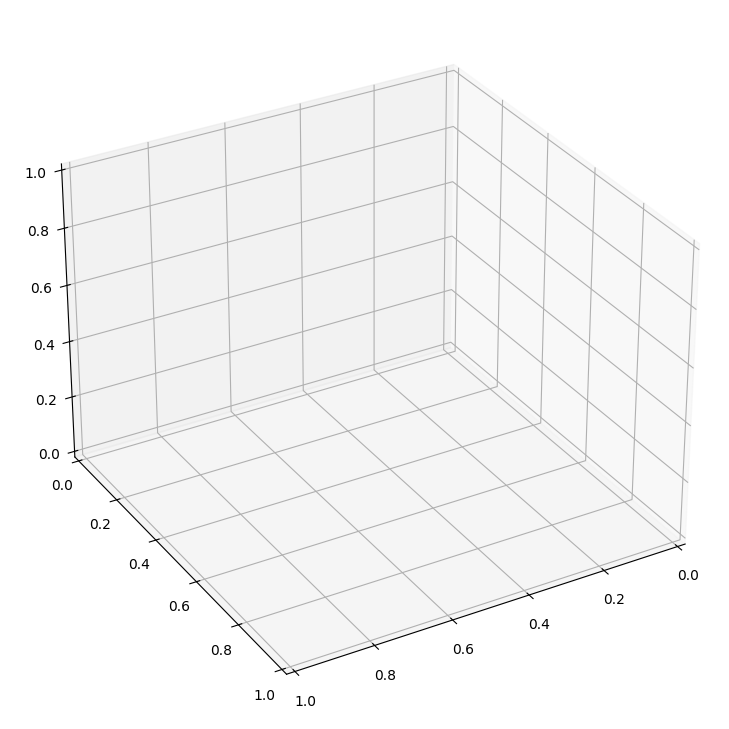

In [54]:
fig = plt.figure(figsize=(10, 12))
spec = fig.add_gridspec(10, 12)
plot_ax = fig.add_subplot(spec[:, :11], projection='3d')
plot_ax.view_init(elev=30, azim=60)
axes_lim = 1.5*pm.radius
plot_ax.set_xlim3d(-axes_lim, axes_lim)
plot_ax.set_ylim3d(-axes_lim, axes_lim)
plot_ax.set_zlim3d(-axes_lim, axes_lim)
plot_ax.set_xlabel('$X [R_\\odot]$', fontsize=14)
plot_ax.set_ylabel('$Y [R_\\odot]$', fontsize=14)
plot_ax.set_zlabel('$Z [R_\\odot]$', fontsize=14)
normalized_los_vector = pm.los_vector/np.linalg.norm(pm.los_vector)
normalized_rotation_axis = pm.rotation_axis/np.linalg.norm(pm.rotation_axis)
mesh=pm
plot_ax.quiver(*(-2.0*mesh.radius*normalized_los_vector), *(mesh.radius*normalized_los_vector),
                   color='red', linewidth=3., label='LOS vector')
plot_ax.quiver(*(0.75*mesh.radius*normalized_rotation_axis), *(mesh.radius*normalized_rotation_axis),
                color='black', linewidth=3., label='Rotation axis')
plot_ax.legend()
vs2 = mesh.cast_vertices
to_be_mapped = pm.mus
norm = mpl.colors.Normalize(vmin=to_be_mapped.min(), vmax=to_be_mapped.max())
mappable = mpl.cm.ScalarMappable(cmap='turbo', norm=norm)
face_colors = mpl.colormaps['turbo'](norm(to_be_mapped))
p = art3d.Poly3DCollection(vs2, facecolors=face_colors, edgecolor="black")
plot_ax.add_collection(p)
mappable.set_array([])
cbar = fig.colorbar(mappable, shrink=0.45, pad=0.125, ax=plot_ax)

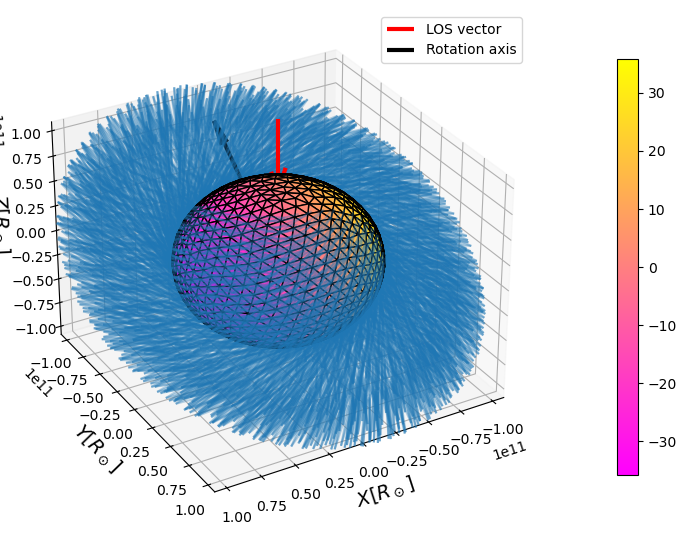

In [ ]:
fig = plt.figure(figsize=(10, 12))
spec = fig.add_gridspec(10, 12)
plot_ax = fig.add_subplot(spec[:, :11], projection='3d')
plot_ax.view_init(elev=30, azim=60)
axes_lim = 1.5*pm.radius
plot_ax.set_xlim3d(-axes_lim, axes_lim)
plot_ax.set_ylim3d(-axes_lim, axes_lim)
plot_ax.set_zlim3d(-axes_lim, axes_lim)
plot_ax.set_xlabel('$X [R_\\odot]$', fontsize=14)
plot_ax.set_ylabel('$Y [R_\\odot]$', fontsize=14)
plot_ax.set_zlabel('$Z [R_\\odot]$', fontsize=14)
normalized_los_vector = pm.los_vector/np.linalg.norm(pm.los_vector)
normalized_rotation_axis = pm.rotation_axis/np.linalg.norm(pm.rotation_axis)
mesh=pm
plot_ax.quiver(*(-2.0*mesh.radius*normalized_los_vector), *(mesh.radius*normalized_los_vector),
                   color='red', linewidth=3., label='LOS vector')
plot_ax.quiver(*(0.75*mesh.radius*normalized_rotation_axis), *(mesh.radius*normalized_rotation_axis),
                color='black', linewidth=3., label='Rotation axis')
plot_ax.legend()
vs2 = mesh.cast_vertices
to_be_mapped = pm.los_velocities
norm = mpl.colors.Normalize(vmin=to_be_mapped.min(), vmax=to_be_mapped.max())
mappable = mpl.cm.ScalarMappable(cmap='spring', norm=norm)
face_colors = mpl.colormaps['spring'](norm(to_be_mapped))
c = pm.centers
v = pm.center_velocities
for cc, vv in zip(c, v):
    plot_ax.quiver(*(cc), *(0.04*mesh.radius*vv), alpha=0.3)
p = art3d.Poly3DCollection(vs2, facecolors=face_colors, edgecolor="black")
plot_ax.add_collection(p)
mappable.set_array([])
cbar = fig.colorbar(mappable, shrink=0.45, pad=0.125, ax=plot_ax)

In [ ]:
pm.rotation_axis

array([ 0.        , -0.70710678,  0.70710678])

In [ ]:
np.rad2deg(np.arcsin(pm.rotation_axis[1]))

-44.99999999999999

In [ ]:
pm.rotation_velocity

50.59273169218562

In [ ]:
pm.radius/u.solRad.to(u.cm)

1.0